In [24]:
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

In [25]:
drive.mount("/content/drive")
df = pd.read_csv('/content/drive/MyDrive/heart.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [27]:
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [28]:
label_encoder = LabelEncoder()

In [29]:
X['Sex'] = label_encoder.fit_transform(df['Sex'])
X['ExerciseAngina'] = label_encoder.fit_transform(df['ExerciseAngina'])

In [30]:
encoder = OneHotEncoder(sparse_output=False)

encoded_array = encoder.fit_transform(df[['ChestPainType', 'RestingECG', 'ST_Slope']])

encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['ChestPainType', 'RestingECG', 'ST_Slope']))

df_combined = pd.concat([X, encoded_df], axis=1)


In [31]:
df_combined = df_combined.drop('ST_Slope',axis=1)
df_combined = df_combined.drop('ChestPainType',axis=1)
df_combined = df_combined.drop('RestingECG',axis=1)
X=df_combined.copy()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [33]:
X_trainDT = X_train.copy()

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train,y_train)

    y_pred_test = knn_model.predict(X_test)

    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

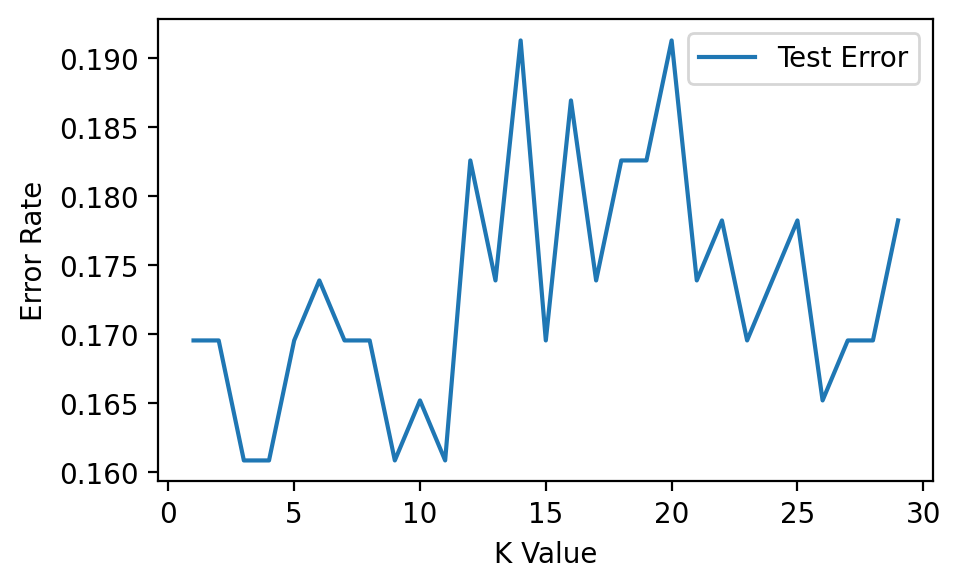

In [36]:
plt.figure(figsize=(5,3),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

In [37]:
KNNclassifier = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
KNNclassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [38]:
y_train_pred = KNNclassifier.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)


y_test_pred = KNNclassifier.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
train_acc, test_acc


(0.9055232558139535, 0.8391304347826087)

In [39]:
DTclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
DTclassifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

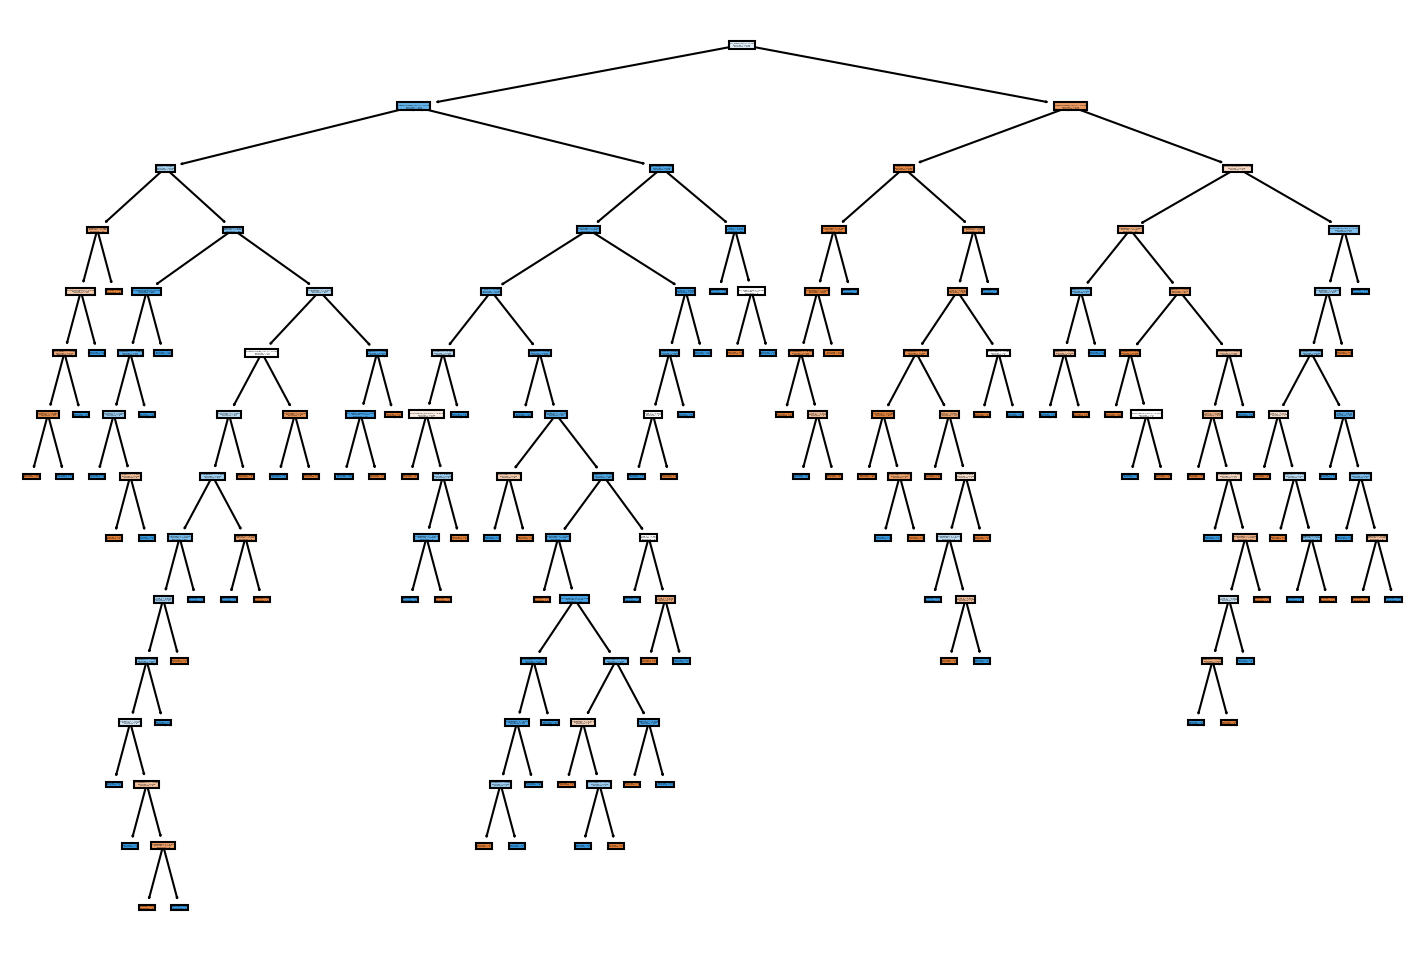

In [40]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(DTclassifier,filled=True,feature_names=X_trainDT.columns);

In [41]:
y_train_pred = DTclassifier.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)


y_test_pred = DTclassifier.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
train_acc, test_acc

(1.0, 0.8391304347826087)

In [42]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

LogisticRegression()

In [43]:
y_train_pred = log_model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)


y_test_pred = log_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
train_acc, test_acc

(0.876453488372093, 0.8260869565217391)

In [44]:
KNNscores = cross_val_score(KNNclassifier,X_train,y_train,
                         scoring='accuracy',cv=5)
np.mean(KNNscores)

0.8474346768221729

In [45]:
DTscores = cross_val_score(DTclassifier,X_train,y_train,
                         scoring='accuracy',cv=5)
np.mean(DTscores)

0.7848513699354702

In [46]:
LOGscores = cross_val_score(log_model,X_train,y_train,
                         scoring='accuracy',cv=5)
np.mean(LOGscores)

0.8764730773299482

In [52]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
# Train the final model with the optimal K
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the final model
accuracy = knn.score(X_test, y_test)
print(f"Test set accuracy with K={3}: {accuracy:.2f}")

# Report precision, recall, and more
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test set accuracy with K=3: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        92
           1       0.85      0.88      0.87       138

    accuracy                           0.84       230
   macro avg       0.83      0.83      0.83       230
weighted avg       0.84      0.84      0.84       230

